## **Superstore Analysis**

##**OBJECTIVES:**
1. To understand, clean and visualize the dataset to gain insights from the data
2. To analyze the Sales and Profit based on different regions, categories and other parameters
3. To analyze the market share based on different parameters
4. To find the States having maximum profit and maximum sales

**GATHERING DATA:**

In [1]:
# Importing the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the csv file
df = pd.read_csv('SampleSuperstore.csv')

**UNDERSTANDING DATA:**

In [3]:
# Viewing the file headers to derive a primary meaning of the data
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### **Statistical Analysis:**

In [ ]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


 **DATA CLEANING:**

Since we need to analyze the Sales of the Superstore, the column named Postal Code is redundant. Hence, we drop that column.

In [4]:
# Drop redundant columns
df.drop(columns="Postal Code", inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# Checking unique values for the column "Country"
df['Country'].unique()

array(['United States'], dtype=object)

Since the entire dataset contains Superstore data of United States alone, thus including the 'Country' column is redundant while analyzing the dataset.

In [ ]:
# Drop redundant columns
df.drop(columns="Country", inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**REMOVING NULL VALUES**

In [ ]:
# Check for null values
df.isna().sum()
#pd.isnull(df).sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Since there are no null values or missing values, hence we can proceed to perform Exploratory Data Analysis on the final dataset.

**REMOVING DUPLICATE VALUES**

In [ ]:
df.duplicated().sum()

50

In [5]:
# Removing duplicate values
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##**Exploratory Data Analysis**

In [ ]:
# Finding the unique values for each column in the dataset
print(df['Ship Mode'].unique())
print(df['Segment'].unique())
print(df['City'].nunique()) #counting number of unique values
print(df['State'].nunique())
print(df['Region'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
531
49
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


### **Sales Analysis**  

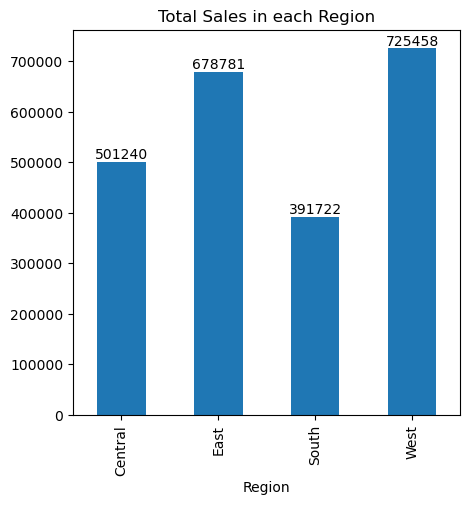

In [6]:
# Sales Analysis based on region
sales_region = df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))
plt.title("Total Sales in each Region")
for container in sales_region.containers:
    sales_region.bar_label(container)

Text(0.5, 1.0, 'Market Share of each Region')

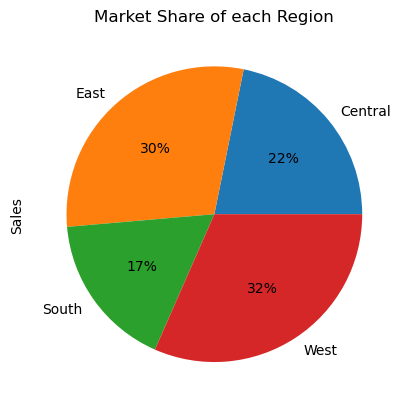

In [7]:
df.groupby('Region')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Market Share of each Region")

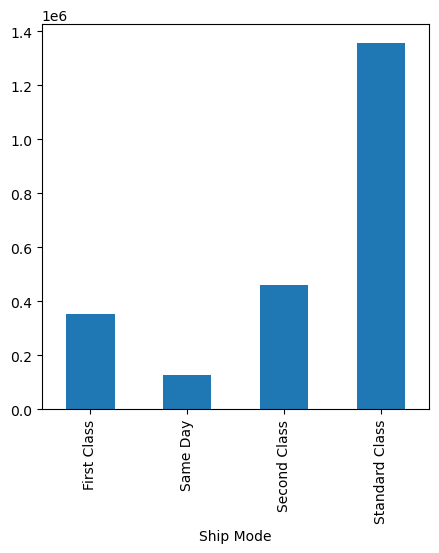

In [8]:
# Sales Analysis based on ship mode
sales_ship = df.groupby('Ship Mode')['Sales'].sum().plot.bar(figsize=(5,5))

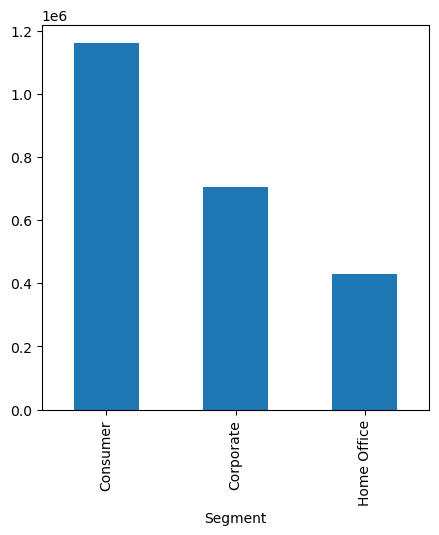

In [9]:
# Sales Analysis based on segment
sales_seg = df.groupby('Segment')['Sales'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Market share of each Segment')

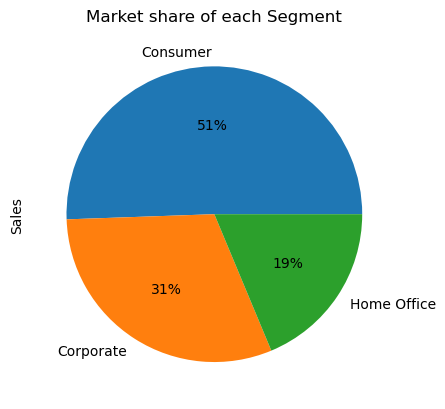

In [10]:
df.groupby('Segment')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Market share of each Segment")

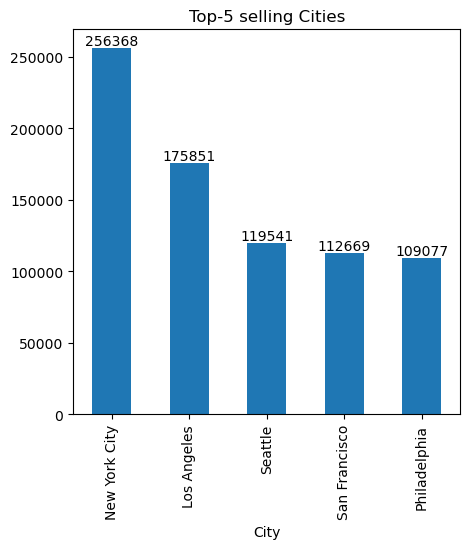

In [11]:
# Sales Analysis based on city- top 5
sales_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 selling Cities")
for container in sales_city.containers:
    sales_city.bar_label(container)

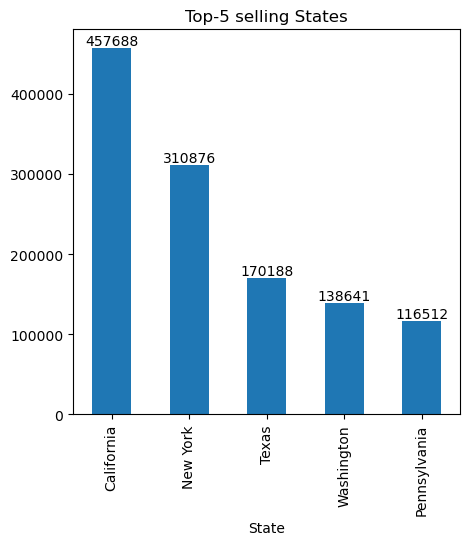

In [12]:
# Sales Analysis based on State- top 5
sales_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 selling States")
for container in sales_state.containers:
    sales_state.bar_label(container)

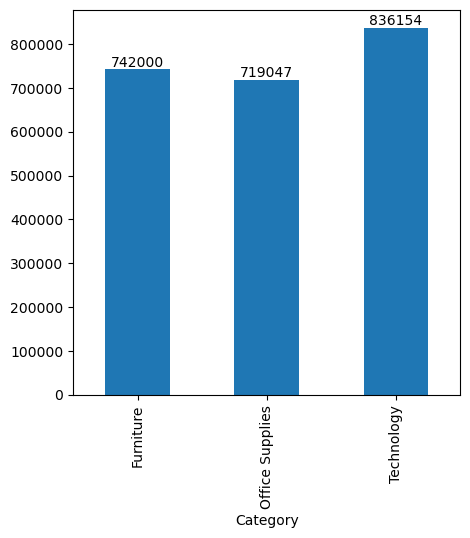

In [13]:
# Sales Analysis based on category
sales_cat = df.groupby('Category')['Sales'].sum().plot.bar(figsize=(5,5))
for container in sales_cat.containers:
    sales_cat.bar_label(container)

Text(0.5, 1.0, 'Market Share of each Category of product')

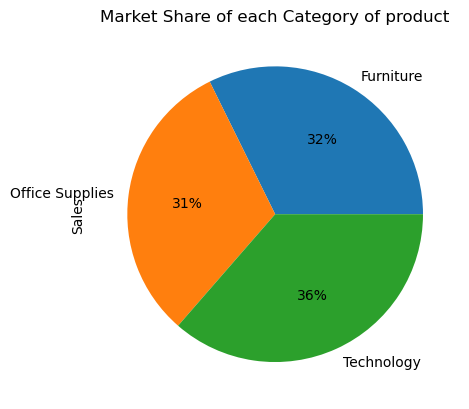

In [15]:
df.groupby('Category')['Sales'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Market Share of each Category of product")

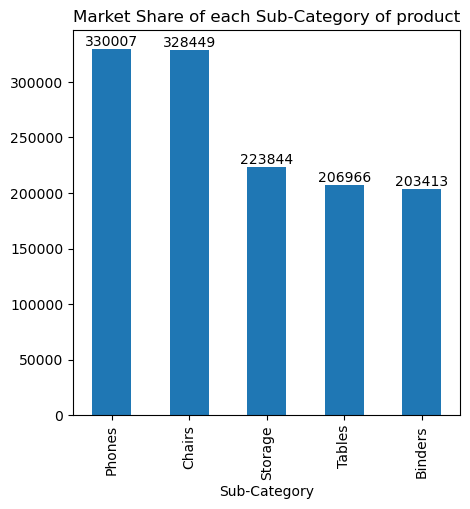

In [14]:
# Sales Analysis based on sub-category
sales_subc = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Market Share of each Sub-Category of product")
for container in sales_subc.containers:
    sales_subc.bar_label(container)

<Axes: xlabel='Sales', ylabel='Discount'>

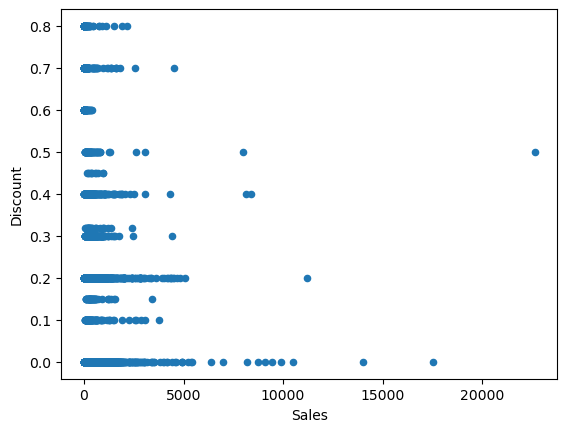

In [16]:
# Sales Analysis based on Discount
df.plot.scatter("Sales","Discount")

<Axes: xlabel='Sales', ylabel='Quantity'>

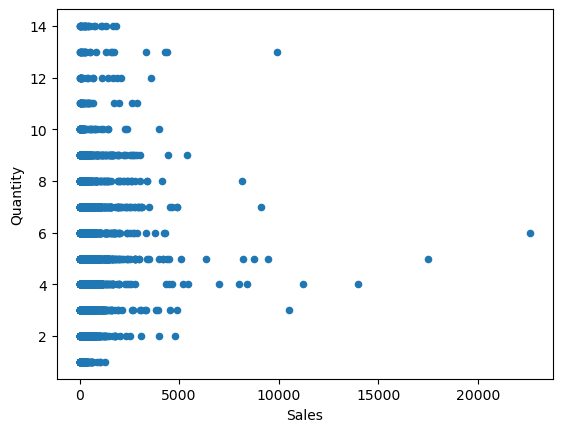

In [17]:
# Sales Analysis based on Quantity
df.plot.scatter("Sales","Quantity")

In [19]:
corr = df.corr(numeric_only=True)
corr['Sales'].sort_values(ascending=False)

Sales       1.000000
Profit      0.479064
Quantity    0.200795
Discount   -0.028190
Name: Sales, dtype: float64

##**Sales Insights**


*   The **West** region contributes to the maximum amount (32%) of sales, followed by the **East** (30%). **South** has the **minimum** sales.
*   The majority of the Sales opts for the shipping mode **Standard Class**
*   The maximum sales occurs in the **Consumer** Segment (51%), followed by **Corporate** (31%)
*   Highest Sales occurs in the **New York City**, followed by **Los Angeles**
*   The State having the highest sales is **California**, followed by **New York**
*   The maximum sales occurs in the **Technology** category (36%) in the Sub-Category of **Phones**, followed by **Chairs** of the category **Furniture**.
Furniture and Office supplies  have nearly equal share of sales.
*   Sales does not depend upon Discount and Quantity significantly, since the coefficient of correlation between them is negligible (~0). However, Sales is directly dependent on Profit, which is quite obvious. Higher the Sales, more is the Profit generated.

## **Conclusion:**


1.   The **West** Region has the maximum amount of Sales followed by the **East**
2.   The city of **Los Angeles** in the State of **California** in the **West** Region of the United States and **New York City** in **New York** in the **East** contributes to the maximum amount of Sales.
3.  The maximum Sales is encountered in the Sub-Category of **Phones** in the Category **Technology**, followed by **Chairs** in the Category **Furniture**. However, Furniture and Office supplies have nearly equal share of Sales.


### **Profit Analysis**


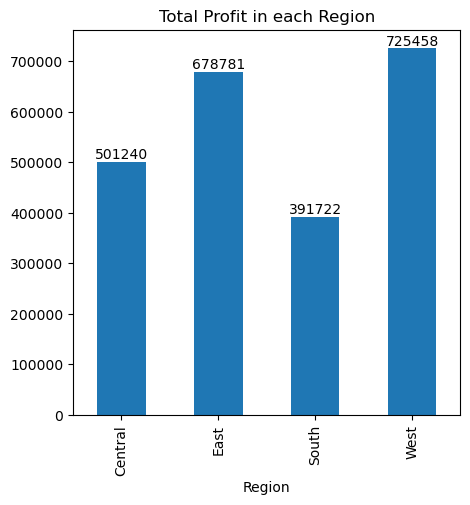

In [20]:
# Profit Analysis based on region
profit_region = df.groupby('Region')['Sales'].sum().plot.bar(figsize=(5,5))
plt.title("Total Profit in each Region")
for container in profit_region.containers:
    profit_region.bar_label(container)

Text(0.5, 1.0, 'Profitability of each Region')

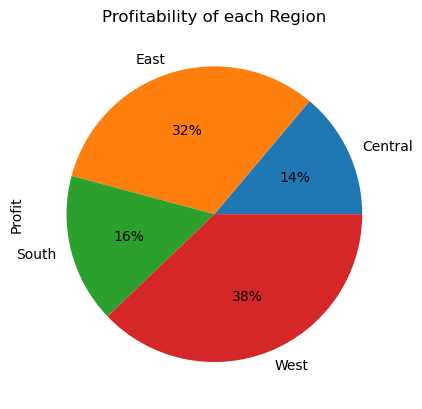

In [21]:
df.groupby('Region')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Region")

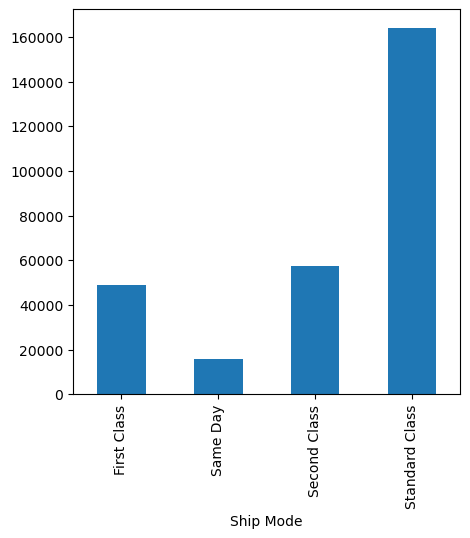

In [22]:
# Profit Analysis based on ship mode
profit_ship = df.groupby('Ship Mode')['Profit'].sum().plot.bar(figsize=(5,5))

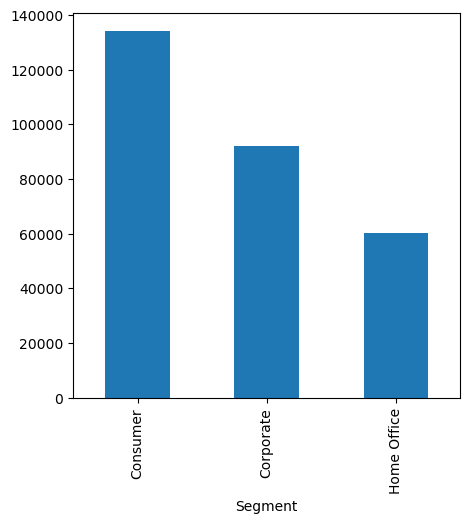

In [23]:
# Profit Analysis based on segment
profit_seg = df.groupby('Segment')['Profit'].sum().plot.bar(figsize=(5,5))

Text(0.5, 1.0, 'Profitability of each Segment')

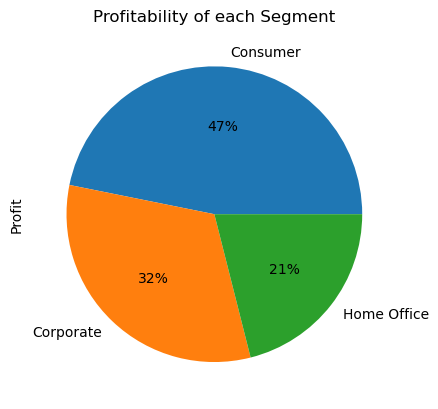

In [24]:
df.groupby('Segment')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Segment")

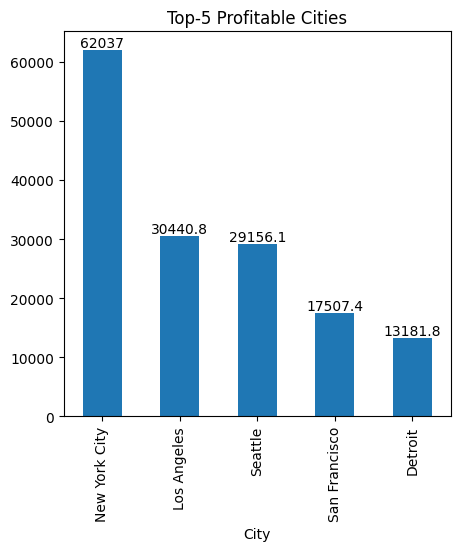

In [ ]:
# Profit Analysis based on city- top 5
profit_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable Cities")
for container in profit_city.containers:
    profit_city.bar_label(container)

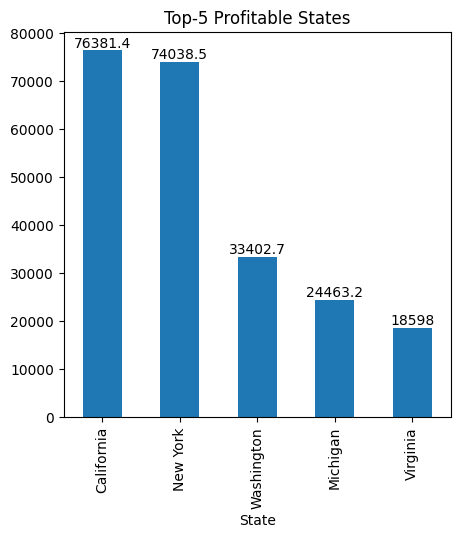

In [ ]:
# Profit Analysis based on State- top 5
profit_state = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5).plot.bar(figsize=(5,5))
plt.title("Top-5 Profitable States")
for container in profit_state.containers:
    profit_state.bar_label(container)

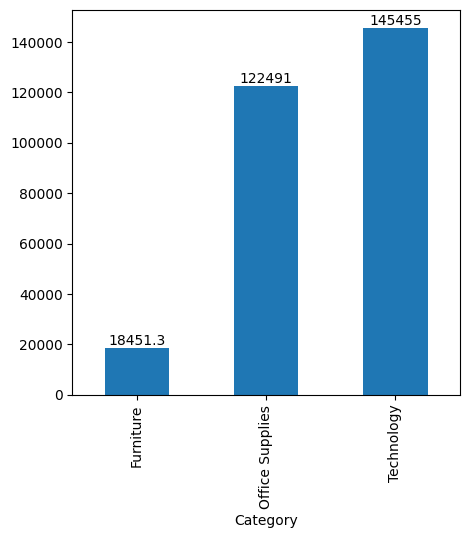

In [ ]:
# Profit Analysis based on category
profit_cat = df.groupby('Category')['Profit'].sum().plot.bar(figsize=(5,5))
for container in profit_cat.containers:
    profit_cat.bar_label(container)

Text(0.5, 1.0, 'Profitability of each Category of product')

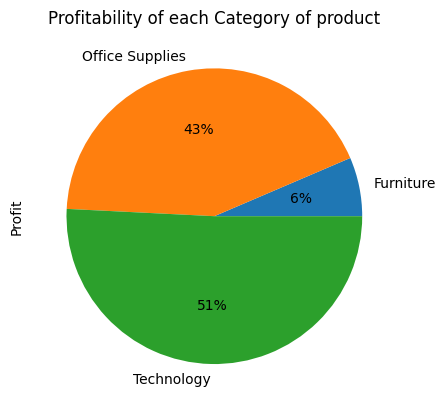

In [ ]:
df.groupby('Category')['Profit'].sum().plot.pie(autopct="%1.0f%%")
plt.title("Profitability of each Category of product")

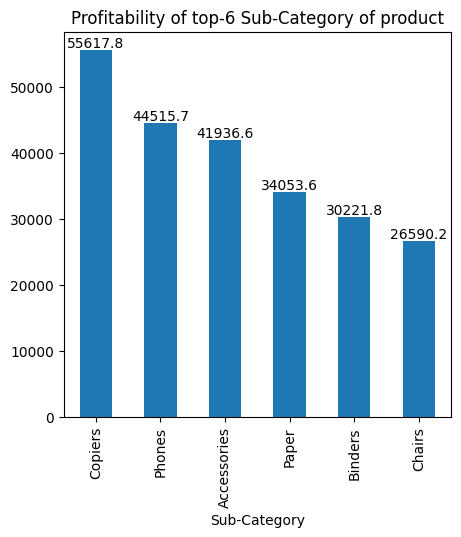

In [ ]:
# Profit Analysis based on sub-category
profit_subc = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot.bar(figsize=(5,5))
plt.title("Profitability of top-6 Sub-Category of product")
for container in profit_subc.containers:
    profit_subc.bar_label(container)

<Axes: xlabel='Profit', ylabel='Discount'>

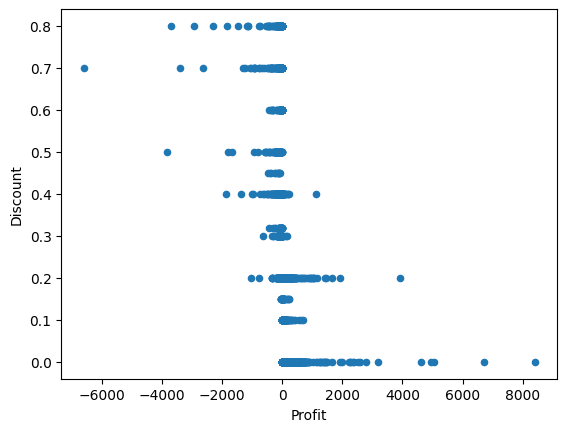

In [ ]:
# Profit Analysis based on Discount
df.plot.scatter("Profit","Discount")

<Axes: xlabel='Profit', ylabel='Quantity'>

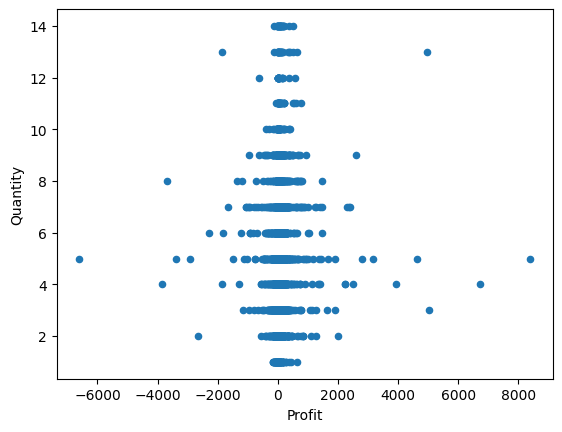

In [ ]:
# Profit Analysis based on Quantity
df.plot.scatter("Profit","Quantity")

In [25]:
corr = df.corr(numeric_only=True)
corr['Profit'].sort_values(ascending=False)

Profit      1.000000
Sales       0.479064
Quantity    0.066253
Discount   -0.219487
Name: Profit, dtype: float64

##**Profit Insights**


*   The **West** region contributes to the maximum amount (38%) of profit, followed by the **East** (32%)
*   The majority of the Profit is earned from sales which opts for the shipping mode **Standard Class**
*   The maximum profit is obtained from the **Consumer** Segment (47%), followed by **Corporate** (32%)
*   Highest Profit is earned in the **New York City**, followed by **Los Angeles** and **Seattle**, which have nearly equal total profit earned.
*   The State having the highest profit is **California** and **New York**, having nearly equal share of Profit
*   The maximum Profit is incurred from the **Technology** category (51%) in the Sub-Category of **Copiers** and **Phones**, followed by the category **Office Supplies** (43%).**Furniture** yields the **least profit** (6%)
*   Profit does not depend upon Discount(related inversely) and Quantity, since the coefficient of correlation between them is negligible (~0). However, Profit is directly dependent on Sales, which is quite obvious. Higher the Sales, more is the Profit generated.


## **Conclusion:**


1.   The **West** Region contributes to the maximum amount of Profit followed by the **East**
2.   The city of **Los Angeles** in the State of **California**, followed by **Seattle** in **Washington** in the **West** Region of the United States and **New York City** in **New York** in the **East** contributes to the maximum amount of Profit.
3.  The maximum Profit is earned in the Sub-Category of **Copiers**, followed by **Phones** in the Category **Technology**, followed by the Category of **Office Supplies**. Furniture yields the least amount of Profit, although its sales is high.


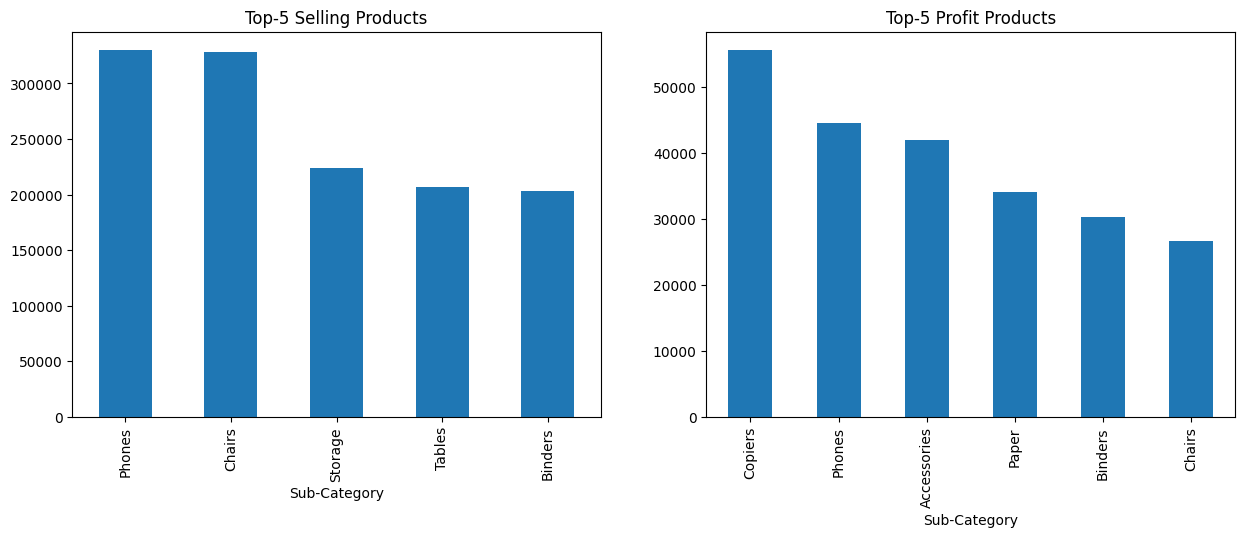

In [ ]:
#Comparing the top selling products vs the top profitable products
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))

# Top 5 selling products in the first plot
sales_pdt=df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5).plot(kind="bar",figsize=(15,5),y="Sales",ax=ax1)
ax1.set_title("Top-5 Selling Products")

# Top 5 profit products in the second plot
profit_pdt=df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(6).plot(kind="bar",figsize=(15,5),y="Profit",ax=ax2)
ax2.set_title("Top-5 Profit Products")

plt.show()

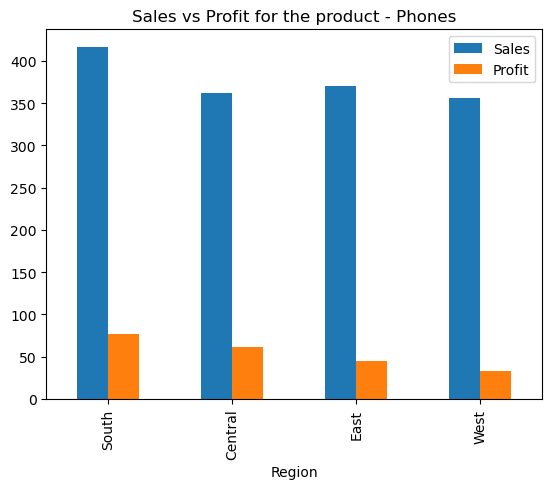

In [26]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Phones"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean(numeric_only=True)[["Sales", "Profit"]].sort_values(by="Profit", ascending=False)

# Plot the data
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product - Phones")
plt.show()

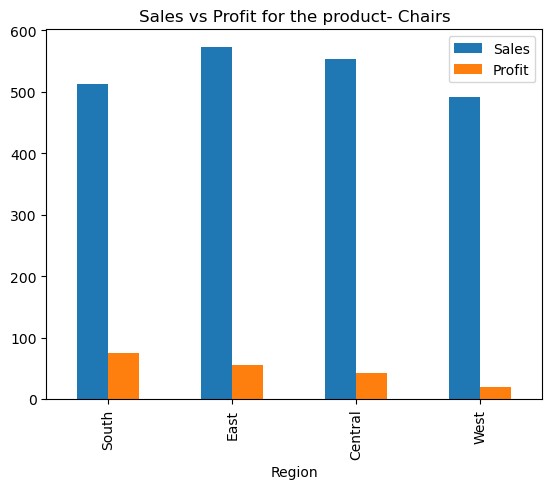

In [30]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Chairs"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean(numeric_only=True)[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Chairs")
plt.show()

Text(0.5, 1.0, 'Sales vs Profit for the product- Copiers')

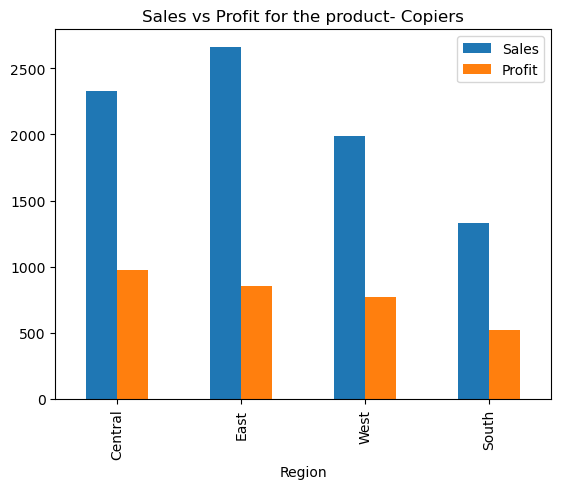

In [31]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Copiers"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean(numeric_only=True)[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Copiers")

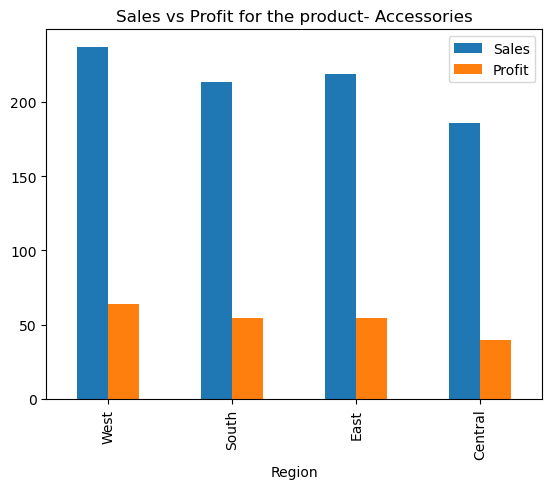

In [32]:
# Filter the data to only include the highest selling products
product = df[df["Sub-Category"] == "Accessories"]

# Group the data by Region
region_group = product.groupby(["Region"]).mean(numeric_only=True)[["Sales", "Profit"]].sort_values(by="Profit",ascending=False)
region_group.plot(kind="bar")
plt.title("Sales vs Profit for the product- Accessories")
plt.show()

**PROFIT MARGIN**

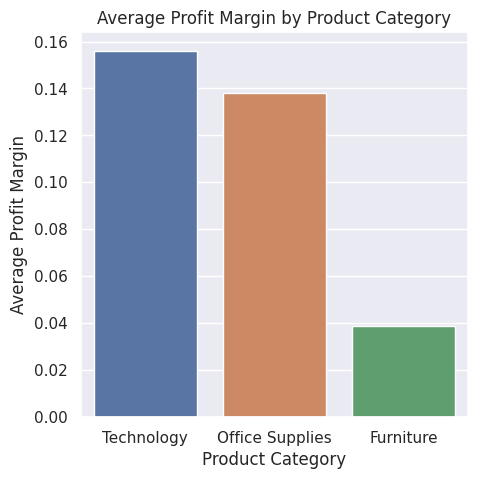

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product category and calculate the average profit margin for each category
avg_profit_margin_by_category = df.groupby(['Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)

# Plot the average profit margin for each category as a bar chart
# avg_profit_margin_by_category.plot(kind='bar')
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Category',y= 'Profit Margin')
# Add a title and labels to the chart
plt.title("Average Profit Margin by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Profit Margin")

plt.show()

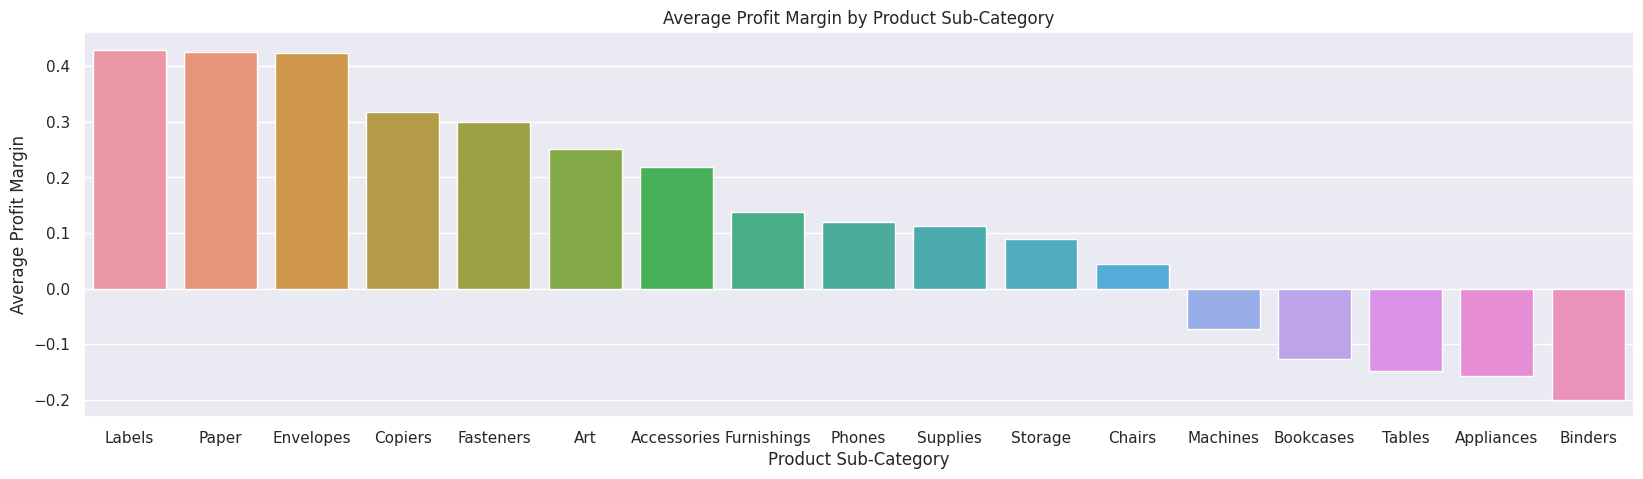

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']
# Group the data by product sub-category and calculate the average profit margin for each sub-category
avg_profit_margin_by_category = df.groupby(['Sub-Category'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Sub-Category',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Sub-Category")
plt.xlabel("Product Sub-Category")
plt.ylabel("Average Profit Margin")

plt.show()

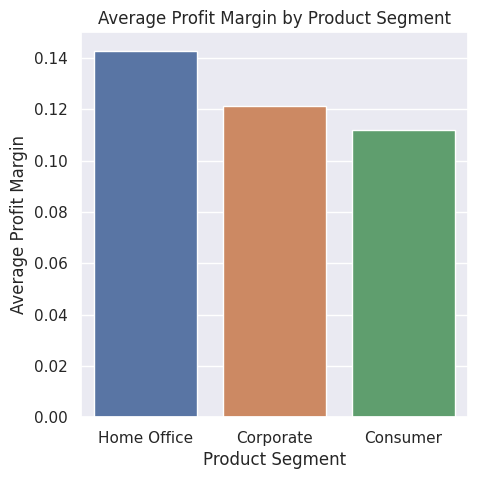

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by product segment and calculate the average profit margin for each segment
avg_profit_margin_by_category = df.groupby(['Segment'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Segment',y= 'Profit Margin')
plt.title("Average Profit Margin by Product Segment")
plt.xlabel("Product Segment")
plt.ylabel("Average Profit Margin")

plt.show()

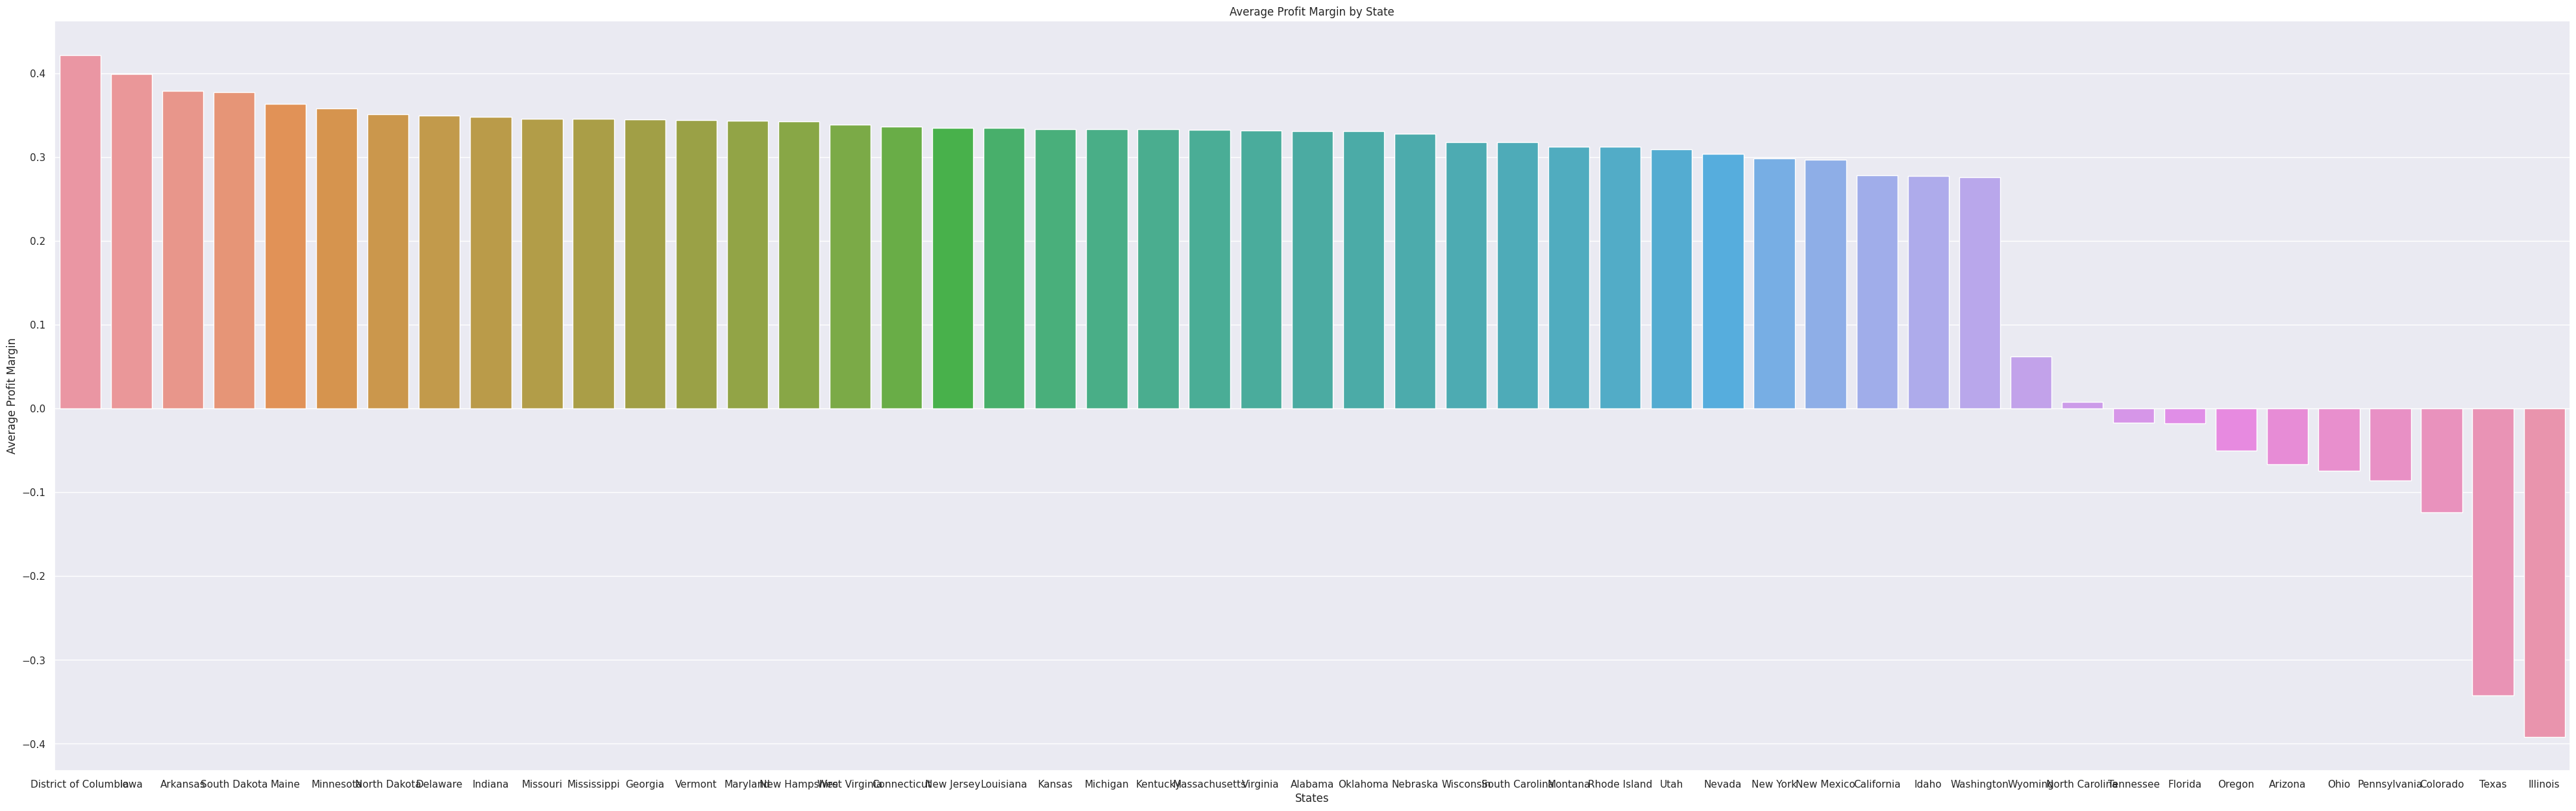

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']

# Group the data by state and calculate the average profit margin for each state
avg_profit_margin_by_category = df.groupby(['State'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(50,15)})
sns.barplot(data = avg_profit_margin_by_category, x = 'State',y= 'Profit Margin')
plt.title("Average Profit Margin by State")
plt.xlabel("States")
plt.ylabel("Average Profit Margin")

plt.show()

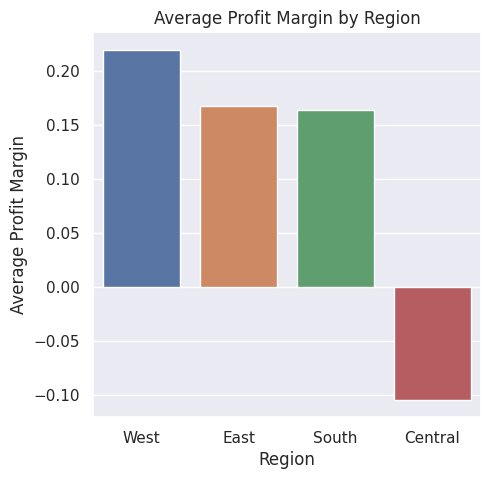

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']
# Group the data by region and calculate the average profit margin for each region
avg_profit_margin_by_category = df.groupby(['Region'],as_index=False)['Profit Margin'].mean().sort_values(by='Profit Margin',ascending=False).head(50)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = avg_profit_margin_by_category, x = 'Region',y= 'Profit Margin')
plt.title("Average Profit Margin by Region")
plt.xlabel("Region")
plt.ylabel("Average Profit Margin")
plt.show()

##**Results of Analysis:**


* Sale of products in the **Technology** Category results in **Maximum Profit Margin**, more specifically **Copiers, Fasteners, Accessories and Phones**, followed by **Office Supplies** including **Labels, Papers and Envelopes**. **Chairs** are the only product in the **Furniture** Category which is **profitable**, other products of this category results in **Loss**
*  The **Segment- Home Office** is the most profitable, followed by **Corporate**
*  Sales in the **West** Region has the Highest **Profitability**, followed by the **East** while that in the **Central** Region suffers the Highest **Loss**